# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 4 - Aprendizaje Supervisado

# Introducción

Al comienzo del proyecto nuestro propósito era construir una cartera (o canasta) de cripto activos con el objetivo de maximizar los retornos a largo plazo y mantener una exposición al riesgo controlada. **¿A qué hacemos referencia cuando hablamos de portafolio?** Nos referimos a un conjunto de activos que adquirimos en un determinado momento y al pasar cierto tiempo decidimos verder algunos (todos o ninguno) para comprar otros. 

Partimos de un capital inicial, por ejemplo 100 USD (o 100 USDT) y destinamos cierto porcentaje del mismo para comprar determinados activos, por ejemplo, compramos 40 USDT de BTC, 30 de ETH y 10 de BNB, con lo cual destinamos un 40%, 30% y 10% de nuestro capital para la compra de estos activos. Pasado un determinado tiempo T (1 día, 1 semana, 1 mes, 3 meses, etc) decidimos rebalancear nuestra cartera, **¿a qué nos referimos con rebalancear una cartera?** simplemente es reajustar el peso (40%, 30% y 10% en el ejemplo anterior) de los diferentes activos que la componen, según la evolución del mercado y el perfil del inversor. Si consideramos que un activo ya no es rentable, podemos sacarlo de nuestro portafolio (venderlo) y comprar otro/otros. Y cuando otro periodo T haya transcurrido, repetimos esta misma operación. 

Nuestro objetivo será entonces aplicar algunas técnicas de aprendizaje automático más complejas que las trabajadas en el práctico anterior, para predecir el comportamiento de los activos y saber cuáles comprar en cada periodo.
 

**Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).


**Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos de prácticos anteriores.

# ¡Actividades!

Como mencionamos en la introducción, nuestro objetivo será armar distintas carteras de inversión y compararlas utilizando diferentes métricas financieras. Utilizaremos una estrategia simple de inversión con la cual compararemos el resto de los portafolios.

**Portafolio base: equal-weighted portfolio**

Comenzamos con un capital inicial de 100 USDT y N activos disponibles para la compra. Al inicio de la inversión compraremos un 100/N % de nuestro capital en cada activo y dejaremos evolucionar el portafolio hasta que pase un cierto periodo T (un porcetage de 100/N % es equivalente a decir que el peso dado a cada activo será el mismo y es igual a 1/N). En el tiempo T, vamos a rebalancear nuestra cartera, es decir, posiblemente en lugar de contar con 100 USDT nuestra inversión haya generado ganancias y ahora sea de 130 USDT, entonces volvemos a asignarle un porcentaje de 100/N % a cada activo (esto llevará a verder parte de los activos y comprar más de otros). Esta será la forma de proceder a medida de se cumpla un nuevo periodo T.

Para más información sobre este tipo de portafolios pueden consultar en el siguiente [link](https://www.investopedia.com/terms/e/equalweight.asp#:~:text=Equal%20weight%20is%20a%20proportional,regardless%20of%20a%20company's%20size.&text=Equal%2Dweighted%20index%20funds%20tend,usually%20have%20higher%20trading%20costs.).

**Estrategias de inversión aplicando ML**

Nuestra tarea será armar portafolios utilizando los mismos N activos que tendrá el portafolio equal-weighted, solo que en lugar de tomar todos ellos, solo compraremos aquellos cuyo precio subirá según lo indiquen los algoritmos de ML. Si al tiempo T, de los N activos, solo M (con M < N) tendrán un aumento en su valor según nuestras predicciones, entonces durante ese periodo compraremos los M activos cuyos pesos en el portafolio será de 1/M. 

**Algunas métricas financieras para evaluar portafolios**

A continuación vemos algunas métricas sencillas para evaluar y comparar distintos portafolios de inversión. 

- [Retorno](https://www.investopedia.com/terms/t/totalreturn.asp)
- [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)
- [Volatilidad](https://www.investopedia.com/terms/v/volatility.asp)
- [Maximun Drawdown](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)

## Parte I

Implementen modelos de clasificación para cada uno de los N activos considerados, con el objeto de predecir si el retorno superará un cierto umbral **R*** (con **R*** > 0), será inferior a **-R*** o se mantendrá en el rango entre **R*** y **-R***. 

Consideren:
- Desicion tree
- Randon Forest 
- XGBoost

**Comentarios**
- Tengan en cuenta que es conveniente trabajar con periodos de tiempo mayores a 1h, por ejemplo, 1 día o 1 semana. Una posibilidad sería rebalancear los portafolios cada 1 semana, pero hacer las predicciones con velas de 1 día, y mantener el activo siempre que el retorno sea mayor al umbral o en encuentre en el rango definido, si alguno de los activos se vende, entonces no vuelve a entrar a la cartera hasta el próximo rebalanceo.
- Por otro lado, en nuestro dataset contamos con periodos alcistas y bajistas del mercado, consideren portafolios para cubrir ambos momentos del mercado.
- En cada periodo T, si la predicción es que el retorno será superior a **R***, sumamos dicho activo a nuestra cartera. En el tiempo T+1, la predicción podría ser:
    - el retorno es mayor a **R*** y en tal caso el activo se mantiene,
    - el retorno es menor a **-R*** y no se lo considera al momento de rebalancear o,
    - el retorno se mantiene entre **-R*** y **R***, en este caso ustedes pueden elegir mantenerlo en la cartera o venderlo.

## Parte II 

Comparen las métricas financieras de los distintos portafolios (incluyendo el equal-weighted) ¿qué pueden decir al respecto?
 

**¡Recuerden!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 2/10__ 

- __Versión final: 2/10__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip uninstall scikit-learn -y
!pip install -U -q scikit-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

from sklearn.metrics import classification_report, precision_score
from xgboost import XGBClassifier

In [4]:
df_features = pd.read_parquet('https://drive.google.com/uc?id=1F7iNl24V2q1ML4KBbvSlCa1S_QieEc__')

# Preprocessing
## Indicadores adicionales

In [5]:
ma_cols = [col for col in df_features if col.find('_MA')>0 and col.find('volume')==-1]

In [6]:
# df['ClgtS10'] = np.where(df['Close'] > df['S10'], 1, -1)

for i in ma_cols:
    coin_name = i[0:i.find('_')] ### BTCUSDT, ETHUSDT, etc
    feature = i[i.find('_')+1:]  ### low_MA_24, etc
    df_features[f'{coin_name}_Clgt_{feature}'] = np.where(df_features[f'{coin_name}_close'] > df_features[i], 1, -1)

df_features.drop(ma_cols, axis=1, inplace=True)

# Equally weighted

Partimos desde el equal-weighted portfolio. En este caso lo único que hicimos fue dividir el capital inicial en partes iguales entre todas las monedas que lo componen y analizamos su rendimiento al final del período, sin utilizar ningún tipo de rebalanceo.

In [7]:
coins = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOTUSDT', 'ADAUSDT']
coins_pct = [i+'_close_pct' for i in coins]

In [8]:
df_pct = df_features.loc['2021-01-01':, coins_pct]
#1/5=0.2
W = np.full(len(coins), 1/len(coins))

In [9]:
# Return porcentual cartera inicial Naive
naive = pd.DataFrame(data=(df_pct * W).sum(axis=1), columns=['Naive'])
naive.head()

,Naive
2021-01-01 00:00:00,-0.000987
2021-01-01 01:00:00,0.011021
2021-01-01 02:00:00,-0.004152
2021-01-01 03:00:00,0.000577
2021-01-01 04:00:00,-0.003855


In [10]:
def performance_acumulada(returns, initial_cap=100):
    performance = returns + 1
    performance.iloc[0] = initial_cap
    performance = performance.cumprod()
    return performance

In [11]:
df_performance = performance_acumulada(naive)
for i in coins:
    df_performance[i] = performance_acumulada(df_pct[f'{i}_close_pct'])

df_performance.head()

,Naive,BTCUSDT,ETHUSDT,BNBUSDT,DOTUSDT,ADAUSDT
2021-01-01 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-01 01:00:00,101.102055,101.430792,101.935783,100.634090,99.808874,101.700737
2021-01-01 02:00:00,100.682260,100.688116,101.360906,101.561413,98.056344,101.756135
2021-01-01 03:00:00,100.740312,100.976957,101.464438,101.467771,98.453714,101.335106
2021-01-01 04:00:00,100.351917,100.776613,101.119784,101.321155,97.830664,100.714642


In [12]:
#performance_acumulada(df_pct.loc[f'2021-01',:], 20)

Luego, usamos un portfolio con un rebalanceo mensual. Al final de cada mes las ganancias generadas por cada moneda se distribuyen en partes iguales entre las demás monedas.


In [13]:
def rebal_port(df, initial_cap):

    performance_ = pd.DataFrame()
    for month in range(1,6):
        performance = performance_acumulada(df.loc[f'2021-{month}',:], initial_cap)
        initial_cap = performance.iloc[-1].mean()
        performance_ = pd.concat([performance_, performance], axis=0)

    return pd.DataFrame(performance_.sum(axis=1))

In [14]:
df_performance['Rebalaced'] = rebal_port(df_pct, round(100 * W[0], 2))

Comparando entre los dos portfolios "básicos", vemos que el rebalanced tiene un mejor rendimiento.


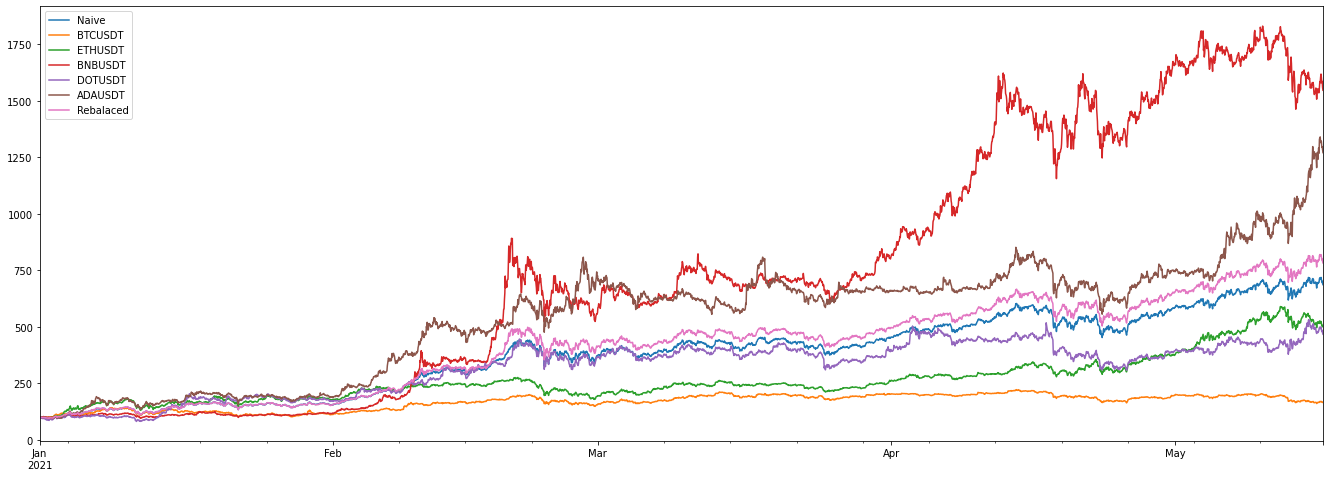

In [15]:
df_performance.plot(figsize=(23,8))

# Modelos

En los portfolios basados en modelos de clasificación lo que hicimos fue, para cada criptoactivo que compone la cartera, generar una predicción binaria (comprar o vender) para cada hora de la semana target (168 hs, 24*7) y luego quedarnos con la clasificación mayoritaria. Si la mayoría de las predicciones indican comprar, compraremos. En caso contrario venderemos y nos quedaremos posicionados en usdt durante la ventana de tiempo.

La clasificación será positiva siempre y cuando el modelo prediga un retorno mayor o igual al 5%, caso contrario indicará la venta. 

Para entrenar al modelo se utilizan las 4 semanas previas a la predicción.




In [16]:
THRESHOLD = 0.05 # Ganancia esperada en cada semana para clasificar como hold
ROLL_WINDOW = 7*24 # Una semana
TRAIN_WIN = 4 # 4 semanas
nuevo_capital = 100.

In [17]:
start_date = pd.to_datetime('2020-12-01')
date_range = pd.date_range(start=pd.to_datetime('2020-12-01'), 
                           end=df_features.index.max(), freq='7D')[:-1] #No agarramos el último porque target tienen NaN por el shift

## Procesamiento DFs

In [18]:
def MA_class(x):
    if x >= 1 + THRESHOLD: return 1
    elif x <= 1 - THRESHOLD: return 0
    else: return 0  # Podría ser 0, o podría ser también otra clase, pero para simplificar, que sea clasificación binaria

In [19]:
def process_df(df, coin, roll_window=ROLL_WINDOW):
    # Agarramos el dataframe correspondiente a la cripto
    df_ = df.loc[:, df.columns.str.contains(coin)]
    # Filtramos el df_ para que arranque en start_date
    df_ = df_.query('index >= @start_date').copy()
    # Buscamos la variable close_pct
    close_pct_col = [i for i in df_.columns if 'close_pct' in i]
    # Generamos la var acumulación % semanal
    df_['week_window_cumprod'] = (
                                df_[close_pct_col]
                                .add(1)
                                .rolling(roll_window)
                                .apply(np.prod)
                                )
    # Generamos la variable target binaria y shifteada una semana
    df_['target'] = df_['week_window_cumprod'].apply(MA_class)
    df_['target'] = df_.target.shift(-roll_window)
    return df_

In [20]:
#coins=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOTUSDT', 'ADAUSDT']
df_btc = process_df(df_features, coin='BTC', roll_window=ROLL_WINDOW)
df_eth = process_df(df_features, coin='ETH', roll_window=ROLL_WINDOW)
df_bnb = process_df(df_features, coin='BNB', roll_window=ROLL_WINDOW)
df_dot = process_df(df_features, coin='DOT', roll_window=ROLL_WINDOW)
df_ada = process_df(df_features, coin='ADA', roll_window=ROLL_WINDOW)

## Funciones modelado

Para ahorrar el uso de código, generamos distintas funciones que contienen los distintos pasos del proceso.


In [21]:
def gen_conjuntos(df, start, end, test_end):
    df_train = df.query('(index >= @start) & (index < @end)')
    df_test = df.query('(index >= @end) & (index < @test_end)')
    X_train = df_train.drop(['week_window_cumprod', 'target'], axis=1)
    y_train = df_train.target
    X_test = df_test.drop(['week_window_cumprod', 'target'], axis=1)
    y_test = df_test.target
    return X_train, y_train, X_test, y_test

def train_eval(X_train, y_train, X_test, y_test, model):
    #RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = precision_score(y_test, preds, zero_division=0)
    return preds, score

def pred_winner(preds):
    votos = pd.Series(preds).value_counts()
    return int(votos.idxmax())

In [22]:
def rebal_port_din(df, start:str, end:str, capital:float, predicciones:list):
    df_ = df.query('(index >= @start) & (index < @end)').add(1).copy()
    performance_ = pd.DataFrame()

    # Si todas las preds negativas, distribuimos capital y no hacemos nada
    if sum(predicciones) == 0:
        df_.loc[:,:] = 1
        df_.iloc[0, :] = np.full(len(predicciones), capital/(len(predicciones)))
        df_ = df_.cumprod()
        return df_, capital
    else:
        # Capital inicial del periodo para las monedas con predicción positiva (si pred=0 --> capital=0)
        df_.iloc[0, :] = [i * capital / sum(predicciones) for i in predicciones]
        df_ = df_.cumprod()
        nuevo_capital = round(df_.iloc[-1, :].sum(), 2)
        return df_, nuevo_capital

## RF

In [23]:
coins = ['BTC', 'ETH', 'BNB', 'DOT', 'ADA']
df_predicciones = pd.DataFrame(columns=coins)
df_rf_score = pd.DataFrame()
performance_rf = pd.DataFrame(columns=df_pct.columns)
nuevo_capital = 100.

for start, end, test_end in zip(date_range, date_range[TRAIN_WIN:], date_range[TRAIN_WIN+1:]):
    weekly_res_list = []
    for coin, df_coin in zip(coins,[df_btc, df_eth, df_bnb, df_dot, df_ada]):
        X_train, y_train, X_test, y_test = gen_conjuntos(df_coin, start, end, test_end)
        preds, score = train_eval(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42))
        weekly_res_list.append(pred_winner(preds))
        df_rf_score.loc[end,coin] = score

    
    df_predicciones = df_predicciones.append(pd.Series(name=end, index=coins, data=weekly_res_list))
    performance_, nuevo_capital = rebal_port_din(df_pct, start=end, end=test_end, capital=nuevo_capital, predicciones=weekly_res_list)
    performance_rf = pd.concat([performance_rf, performance_], axis=0)

    #W_updated = W * weekly_res_list # W de compra/no-compra semanal

df_performance['RF'] = performance_rf.sum(axis=1)

In [24]:
df_rf_score.head()

,BTC,ETH,BNB,DOT,ADA
2020-12-29,0.958333,0.890625,0.761905,0.628099,1.000000
2021-01-05,0.120567,1.000000,1.000000,1.000000,0.583333
2021-01-12,0.650000,1.000000,0.657143,0.816456,0.541667
2021-01-19,0.368932,0.646465,0.566038,0.094340,0.407407
2021-01-26,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_performance.head()

,Naive,BTCUSDT,ETHUSDT,BNBUSDT,DOTUSDT,ADAUSDT,Rebalaced,RF
2021-01-01 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-01 01:00:00,101.102055,101.430792,101.935783,100.634090,99.808874,101.700737,101.102055,100.952385
2021-01-01 02:00:00,100.682260,100.688116,101.360906,101.561413,98.056344,101.756135,100.684583,100.416695
2021-01-01 03:00:00,100.740312,100.976957,101.464438,101.467771,98.453714,101.335106,100.739597,100.590720
2021-01-01 04:00:00,100.351917,100.776613,101.119784,101.321155,97.830664,100.714642,100.352572,100.262054


In [26]:
df_predicciones

,BTC,ETH,BNB,DOT,ADA
2020-12-29,1,1,1,1,0
2021-01-05,1,0,0,0,1
2021-01-12,0,0,0,1,1
2021-01-19,1,1,1,1,0
2021-01-26,0,0,0,0,0
2021-02-02,0,0,0,1,0
2021-02-09,1,1,1,1,1
2021-02-16,1,0,1,1,1
2021-02-23,0,1,0,0,1
2021-03-02,0,1,0,0,0


In [27]:
df_performance['RF'] = df_performance['RF'].fillna(method="ffill")

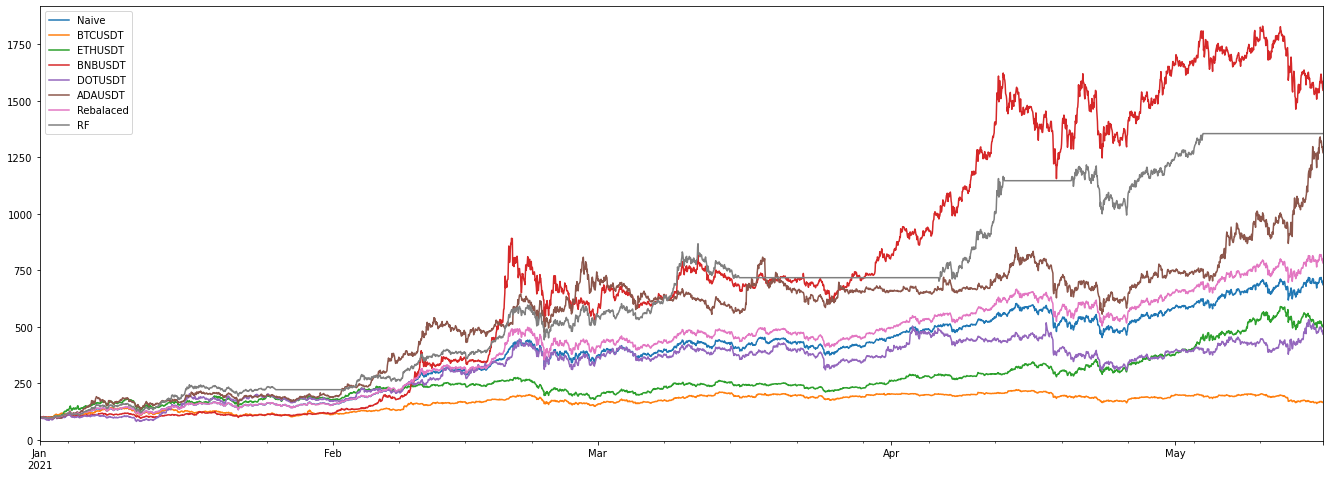

In [28]:
fig, ax = plt.subplots(figsize=(23,8))
df_performance.plot(ax=ax)

## Xgboost

In [29]:
coins = ['BTC', 'ETH', 'BNB', 'DOT', 'ADA']
df_predicciones = pd.DataFrame(columns=coins)
df_xgb_score = pd.DataFrame()
performance_xgb = pd.DataFrame(columns=df_pct.columns)
nuevo_capital = 100.

for start, end, test_end in zip(date_range, date_range[TRAIN_WIN:], date_range[TRAIN_WIN+1:]):
    weekly_res_list = []
    for coin, df_coin in zip(coins,[df_btc, df_eth, df_bnb, df_dot, df_ada]):
        X_train, y_train, X_test, y_test = gen_conjuntos(df_coin, start, end, test_end)
        preds, score = train_eval(X_train, y_train, X_test, y_test, XGBClassifier(random_state=42))
        weekly_res_list.append(pred_winner(preds))
        df_xgb_score.loc[end,coin] = score

    
    df_predicciones = df_predicciones.append(pd.Series(name=end, index=coins, data=weekly_res_list))
    performance_, nuevo_capital = rebal_port_din(df_pct, start=end, end=test_end, capital=nuevo_capital, predicciones=weekly_res_list)
    performance_xgb = pd.concat([performance_xgb, performance_], axis=0)

    #W_updated = W * weekly_res_list # W de compra/no-compra semanal

df_performance['XGB'] = performance_xgb.sum(axis=1)

In [30]:
df_xgb_score.head()

,BTC,ETH,BNB,DOT,ADA
2020-12-29,1.000000,0.915663,0.761905,1.000000,0.000000
2021-01-05,0.185629,1.000000,0.666667,0.974359,0.583333
2021-01-12,0.295455,0.790541,0.393162,0.791667,0.541667
2021-01-19,0.490196,0.580357,0.384615,0.096774,0.179310
2021-01-26,1.000000,1.000000,1.000000,0.000000,1.000000


In [31]:
df_performance.head()

,Naive,BTCUSDT,ETHUSDT,BNBUSDT,DOTUSDT,ADAUSDT,Rebalaced,RF,XGB
2021-01-01 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-01 01:00:00,101.102055,101.430792,101.935783,100.634090,99.808874,101.700737,101.102055,100.952385,101.284936
2021-01-01 02:00:00,100.682260,100.688116,101.360906,101.561413,98.056344,101.756135,100.684583,100.416695,101.461159
2021-01-01 03:00:00,100.740312,100.976957,101.464438,101.467771,98.453714,101.335106,100.739597,100.590720,101.466105
2021-01-01 04:00:00,100.351917,100.776613,101.119784,101.321155,97.830664,100.714642,100.352572,100.262054,101.220469


In [32]:
df_predicciones

,BTC,ETH,BNB,DOT,ADA
2020-12-29,0,1,1,0,0
2021-01-05,1,0,0,0,1
2021-01-12,0,1,1,1,1
2021-01-19,0,1,0,1,1
2021-01-26,0,0,0,0,0
2021-02-02,0,0,0,1,0
2021-02-09,0,1,1,1,1
2021-02-16,1,0,1,1,1
2021-02-23,0,1,0,0,1
2021-03-02,0,1,0,0,0


In [33]:
df_performance['XGB'] = df_performance['XGB'].fillna(method="ffill")

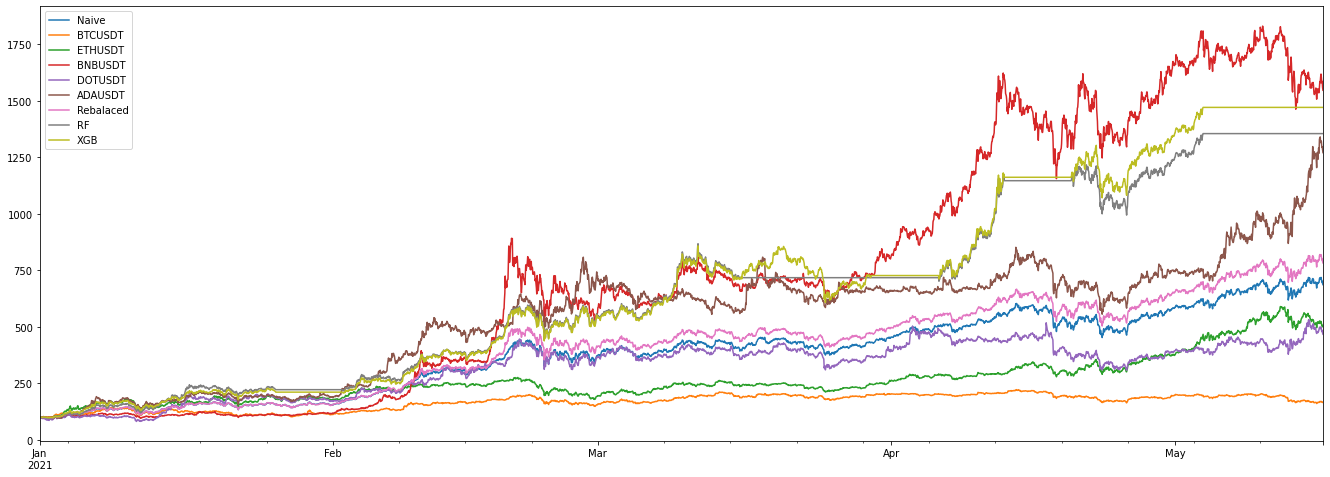

In [34]:
fig, ax = plt.subplots(figsize=(23,8))
df_performance.plot(ax=ax)

## Decision tree

In [35]:
coins = ['BTC', 'ETH', 'BNB', 'DOT', 'ADA']
df_predicciones = pd.DataFrame(columns=coins)
df_dt_score = pd.DataFrame()
performance_dt = pd.DataFrame(columns=df_pct.columns)
nuevo_capital = 100.

for start, end, test_end in zip(date_range, date_range[TRAIN_WIN:], date_range[TRAIN_WIN+1:]):
    weekly_res_list = []
    for coin, df_coin in zip(coins,[df_btc, df_eth, df_bnb, df_dot, df_ada]):
        X_train, y_train, X_test, y_test = gen_conjuntos(df_coin, start, end, test_end)
        preds, score = train_eval(X_train, y_train, X_test, y_test, DecisionTreeClassifier(random_state=42))
        weekly_res_list.append(pred_winner(preds))
        df_dt_score.loc[end,coin] = score

    
    df_predicciones = df_predicciones.append(pd.Series(name=end, index=coins, data=weekly_res_list))
    performance_, nuevo_capital = rebal_port_din(df_pct, start=end, end=test_end, capital=nuevo_capital, predicciones=weekly_res_list)
    performance_dt = pd.concat([performance_dt, performance_], axis=0)

    #W_updated = W * weekly_res_list # W de compra/no-compra semanal

df_performance['DT'] = performance_dt.sum(axis=1)

In [36]:
df_dt_score.head()

,BTC,ETH,BNB,DOT,ADA
2020-12-29,1.000000,1.000000,0.761905,0.424242,1.000000
2021-01-05,0.730769,0.000000,0.384615,1.000000,0.583333
2021-01-12,0.619048,0.983871,0.975000,0.751825,0.577922
2021-01-19,0.000000,1.000000,0.616667,0.000000,0.636364
2021-01-26,0.967742,1.000000,1.000000,1.000000,1.000000


In [37]:
df_performance.head()

,Naive,BTCUSDT,ETHUSDT,BNBUSDT,DOTUSDT,ADAUSDT,Rebalaced,RF,XGB,DT
2021-01-01 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-01 01:00:00,101.102055,101.430792,101.935783,100.634090,99.808874,101.700737,101.102055,100.952385,101.284936,100.634090
2021-01-01 02:00:00,100.682260,100.688116,101.360906,101.561413,98.056344,101.756135,100.684583,100.416695,101.461159,101.561413
2021-01-01 03:00:00,100.740312,100.976957,101.464438,101.467771,98.453714,101.335106,100.739597,100.590720,101.466105,101.467771
2021-01-01 04:00:00,100.351917,100.776613,101.119784,101.321155,97.830664,100.714642,100.352572,100.262054,101.220469,101.321155


In [38]:
df_predicciones

,BTC,ETH,BNB,DOT,ADA
2020-12-29,0,0,1,0,0
2021-01-05,0,0,0,0,1
2021-01-12,0,0,0,1,1
2021-01-19,0,0,1,0,0
2021-01-26,0,0,0,0,0
2021-02-02,0,1,0,1,0
2021-02-09,1,0,1,1,1
2021-02-16,1,0,1,1,1
2021-02-23,0,1,0,0,1
2021-03-02,0,1,0,0,0


In [39]:
df_performance['DT'] = df_performance['DT'].fillna(method="ffill")

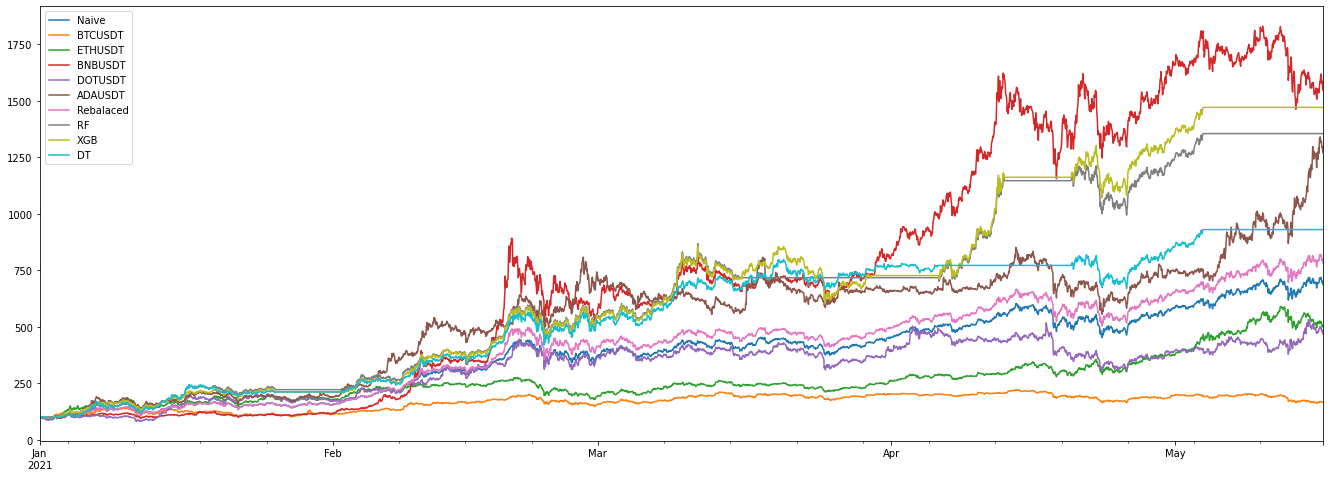

In [40]:
fig, ax = plt.subplots(figsize=(23,8))
df_performance.plot(ax=ax)

# Métricas

Para analizar los portfolios tomaremos 4 métricas:
* Rendimiento acumulado: el porcentaje de retorno que genera el portfolio durante el período analizado.
* Beta: mide el grado de variabilidad de la rentabilidad de un activo respecto a la rentabilidad promedio del "mercado". En este caso se compara con todos los demás portfolios y criptoactivos individuales.
* Ratio de Sharpe: se utiliza para mostrar hasta qué punto el rendimiento de una inversión compensa al inversor por asumir riesgo en su inversión.
* Maximum drawdown: mide el retroceso en la curva de rendimientos respecto al anterior máximo en dicha curva y es otra forma de medir el riesgo de una inversión. 

In [41]:
def totalReturn(df, column):
  
  start = df.loc[df.first_valid_index(), column]
  end = df.loc[df.last_valid_index(), column]

  tot_ret = (end - start)/start-1
  
  return round(tot_ret,2)

In [42]:
def volatility(df, column):

  #Calcula el coeficiente beta (rendimiento del activo vs rendimiento del mercado)

  returns=[]

  for i in df.columns:
    start = df.loc[df.first_valid_index(), i]
    end = df.loc[df.last_valid_index(), i]
    tot_ret = (end - start)/start-1
    returns.append(tot_ret)
  
  market_return = sum(returns)/len(returns)

  start = df.loc[df.first_valid_index(), column]
  end = df.loc[df.last_valid_index(), column]
  tot_ret = (end - start)/start-1

  return round(tot_ret/market_return, 2)

In [43]:
def sharpeRatio(df, column, risk_free_rate):

  start = df.loc[df.first_valid_index(), column]
  end = df.loc[df.last_valid_index(), column]
  tot_ret = (end - start)/start-1

  std_dev = df.loc[df.first_valid_index():df.last_valid_index(), column].std()

  return round((tot_ret-risk_free_rate)/std_dev, 3)

In [44]:
def MDD(df, column):

  max_value = df.loc[:, column].max()
  max_index = df.loc[:, column].idxmax()
  min_value = df.loc[max_index:, column].min()

  return round((min_value-max_value)/max_value ,2)

In [45]:
df_indicators = pd.DataFrame({'indicator':['totalReturn','Beta','sharpeRatio','MDD']})

for i in df_performance.columns:
  
  df_indicators.loc[0,i] = totalReturn(df_performance,i)
  df_indicators.loc[1,i] = volatility(df_performance,i)
  df_indicators.loc[2,i] = sharpeRatio(df_performance,i,.03)
  df_indicators.loc[3,i] = MDD(df_performance,i)


# Conclusiones

Cuando comparamos los distintos portfolios basados en modelos de clasificación con los demás portfolios (e incluso con el rendimiento de cada moneda en forma individual), se nota que exhiben una clara superioridad en términos de rendimiento, ya sea mirando el rendimiento total o la beta. 

A su vez, también quedan bien posicionados en el Sharpe Ratio y el MDD, lo que indica que el rendimiento obtenido no fue a costa de un aumento del riesgo.


In [46]:
df_indicators

,indicator,Naive,BTCUSDT,ETHUSDT,BNBUSDT,DOTUSDT,ADAUSDT,Rebalaced,RF,XGB,DT
0,totalReturn,4.870,-0.340,3.01,13.470,2.680,10.710,5.830,11.550,12.710,7.310
1,Beta,0.680,-0.050,0.42,1.880,0.370,1.490,0.810,1.610,1.770,1.020
2,sharpeRatio,0.028,-0.011,0.03,0.024,0.023,0.042,0.029,0.029,0.029,0.027
3,MDD,-0.040,-0.280,-0.17,-0.200,-0.120,-0.050,-0.050,0.000,0.000,0.000


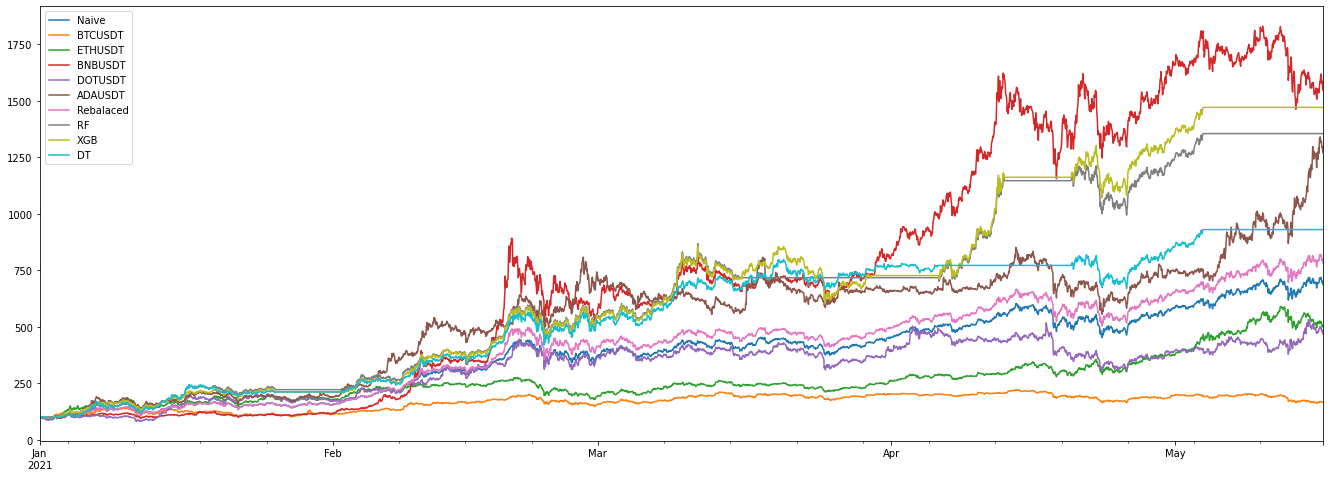

In [47]:
fig, ax = plt.subplots(figsize=(23,8))
df_performance.plot(ax=ax)